In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
import FACSPy as fp

In [3]:
dataset = fp.read_dataset(input_dir = "../../Tutorials/spectral_dataset",
                          file_name = "raw_dataset_samplewise")


In [4]:
### we set the default settings to the transformed data and the CD4_T_cells gate
fp.settings.default_layer = "transformed"
fp.settings.default_gate = "CD4_T_cells"

In [5]:
### we calculate PCA, neighbors and leiden clustering on CD4_T_cells using the transformed layer

fp.tl.pca(dataset)
fp.tl.neighbors(dataset)
fp.tl.leiden(dataset)


In [6]:
### we calculate umap on CD4_T_cells
fp.tl.umap(dataset)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


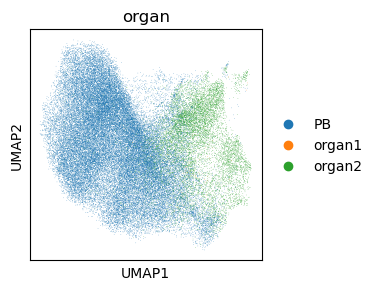

In [7]:
### using the plotting functionality, we plot umap and color by organ
fp.pl.umap(dataset,
           color = "organ")

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


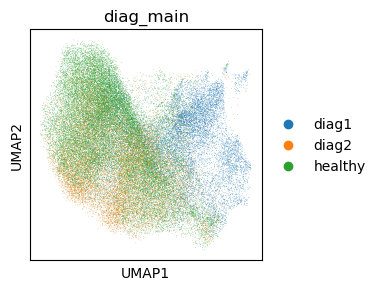

In [8]:
### using the plotting functionality, we plot umap and color by main diagnosis
fp.pl.umap(dataset,
           color = "diag_main")

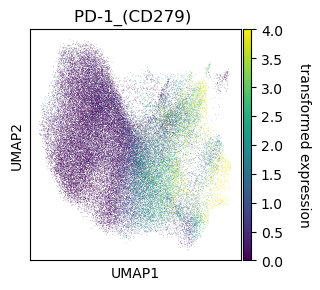

In [9]:
### using the plotting functionality, we plot umap and color by PD-1
fp.pl.umap(dataset,
           color = "PD-1_(CD279) ",
           vmin = 0,
           vmax = 4)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
posx and posy should be finite values


posx and posy should be finite values


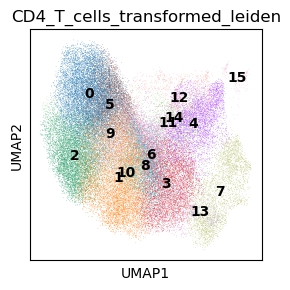

In [10]:
### using the plotting functionality, we plot umap and color by leiden clusters
fp.pl.umap(dataset,
           color = "CD4_T_cells_transformed_leiden",
           legend_loc = "on data")

In [11]:
### we can calculate the MFI per cluster using the tl.mfi functionality and passing the groupby parameter
### implicitly, the data are calculated for sample_ID and the new group to get a statistically relevant dataframe
fp.tl.mfi(dataset,
          groupby = "CD4_T_cells_transformed_leiden",
          layer = "compensated")
fp.tl.fop(dataset,
          groupby = "CD4_T_cells_transformed_leiden",
          layer = "compensated")

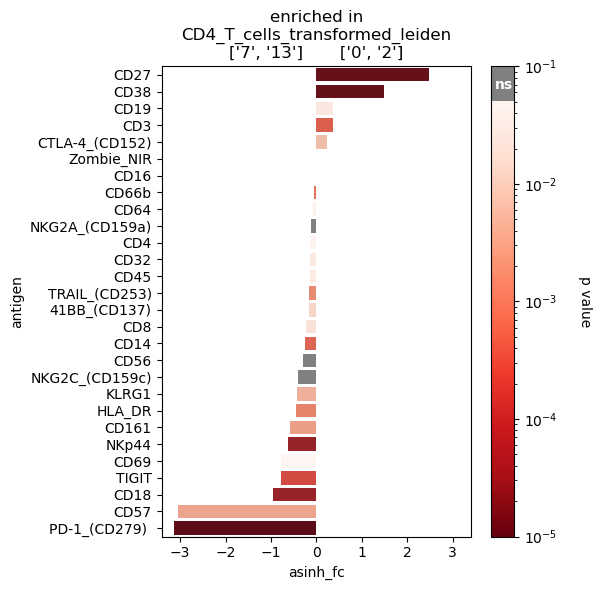

In [12]:
### using the fold-change analysis, we can compare expression changes between clusters
### 

fp.pl.fold_change(dataset,
                  layer = "compensated",
                  data_group = "CD4_T_cells_transformed_leiden",
                  groupby  = "CD4_T_cells_transformed_leiden",
                  group1 = ["7", "13"],
                  group2 = ["0", "2"],
                  figsize = (6,6))

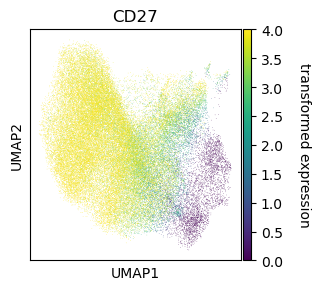

In [13]:
###... and visualize them on the UMAP
fp.pl.umap(dataset,
           color = "CD27",
           vmin = 0,
           vmax = 4)

In [14]:
### if we set aggregate to True, we calculate only the MFI per cluster
### this is important for visualization via heatmaps.
fp.tl.mfi(dataset,
          groupby = "CD4_T_cells_transformed_leiden",
          layer = "compensated",
          aggregate = True)

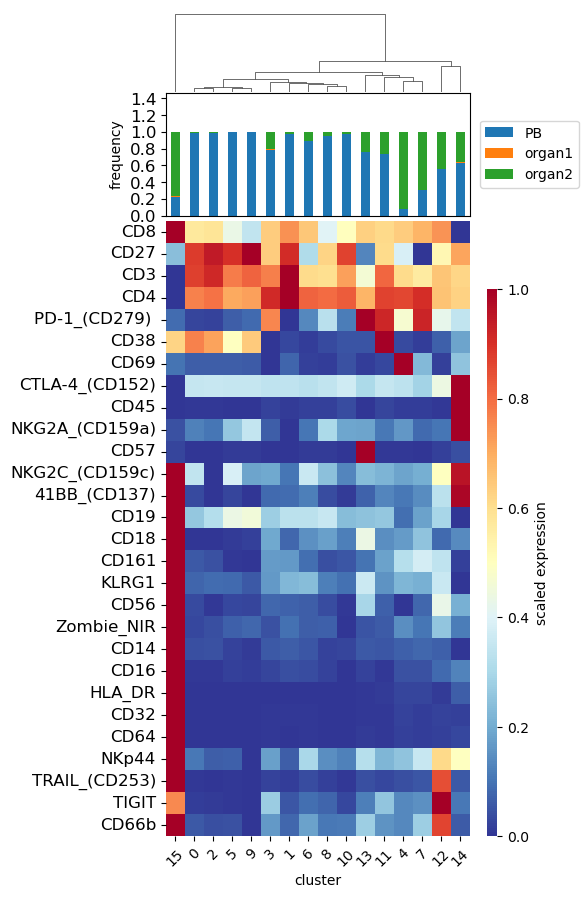

In [15]:
### we plot the scaled expressions per cluster using the pl.cluster_heatmap function
### using annotate = "frequency", we plot the frequency of organ in a top plot
### the annotation kwargs are needed for the plot configuration
fp.pl.cluster_heatmap(dataset,
                      layer = "compensated",
                      data_group = "CD4_T_cells_transformed_leiden",
                      figsize = (5,9),
                      y_label_fontsize = 12,
                      annotate = "frequency",
                      annotation_kwargs = {"groupby": "organ",
                                           "cluster_key": "CD4_T_cells_transformed_leiden"},
                      cmap = "RdYlBu_r"
                      )

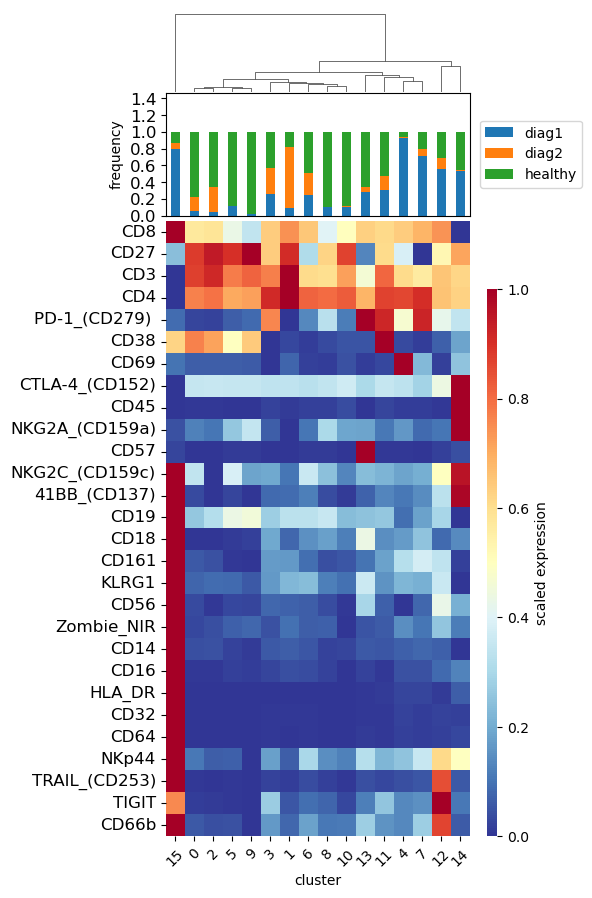

In [16]:
### we plot the scaled expressions per cluster using the pl.cluster_heatmap function
### using annotate = "frequency", we plot the frequency of main diagnosis in a top plot
### the annotation kwargs are needed for the plot configuration
### we see, that cluster 15 is mainly dominated by one specific diagnosis
fp.pl.cluster_heatmap(dataset,
                      layer = "compensated",
                      data_group = "CD4_T_cells_transformed_leiden",
                      figsize = (5,9),
                      y_label_fontsize = 12,
                      annotate = "frequency",
                      annotation_kwargs = {"groupby": "diag_main",
                                           "cluster_key": "CD4_T_cells_transformed_leiden"},
                      cmap = "RdYlBu_r"
                      )

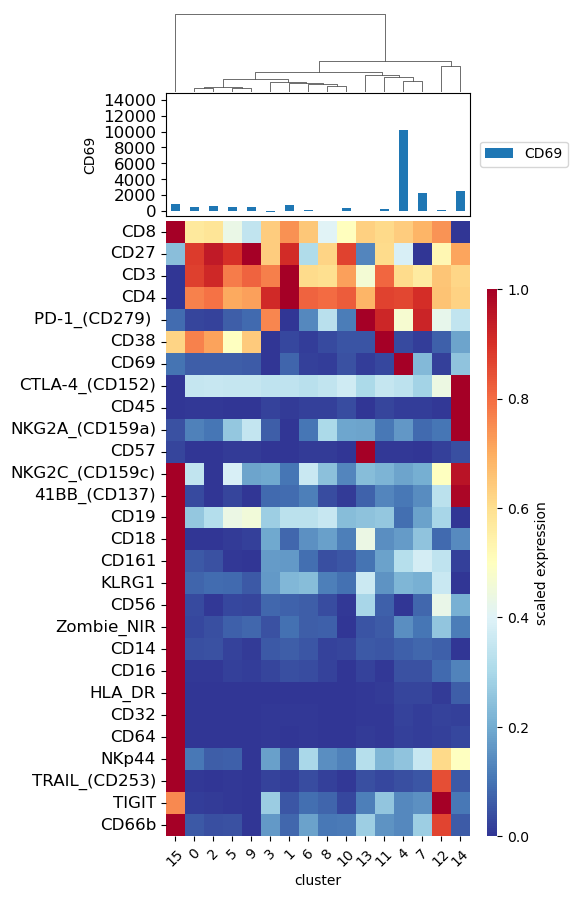

In [17]:
### we plot the scaled expressions per cluster using the pl.cluster_heatmap function
### using annotate = "CD69", we plot the mfi values of CD69 per cluster
fp.pl.cluster_heatmap(dataset,
                      layer = "compensated",
                      data_group = "CD4_T_cells_transformed_leiden",
                      figsize = (5,9),
                      y_label_fontsize = 12,
                      annotate = "CD69",
                      cmap = "RdYlBu_r")

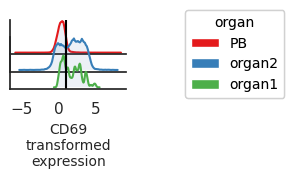

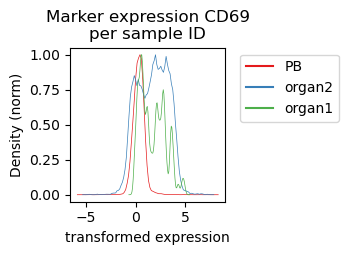

In [18]:
### using the marker density functionality, we can plot the marker expression distribution

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

fp.pl.marker_density(dataset,
                     markers = "CD69",
                     groupby = "organ",
                     colorby = "organ",
                     ridge = True)

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
fp.pl.marker_density(dataset,
                     markers = "CD69",
                     groupby = "organ",
                     colorby = "organ",
                     ridge = False)

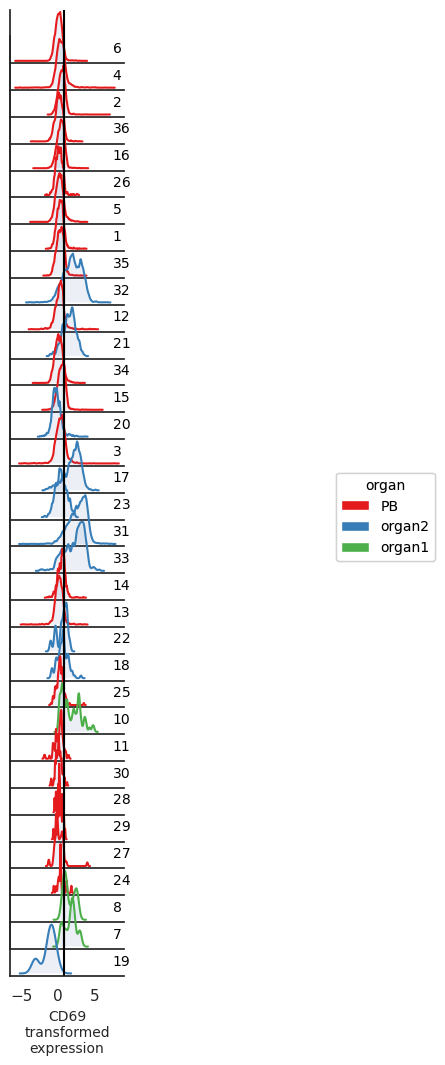

In [19]:
### using the marker density functionality, we can plot the marker expression distribution
### this can sometimes help to identify outliers that are visible in the PCA.

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

fp.pl.marker_density(dataset,
                     markers = "CD69",
                     groupby = "sample_ID",
                     colorby = "organ",
                     ridge = True)